In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor       
from sklearn.neighbors import KNeighborsRegressor     
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
lists = pd.read_excel("/content/train set.xls")
a=lists.values
number = a[1:len(a)]
number1 = pd.DataFrame()
number2 = pd.DataFrame()
for i in range (len(lists)-1):
  number1[i]=number[i][1:13]
  number2[i]=number[i][14:15]
new_number1 = pd.DataFrame(number1.values.T, index=number1.columns, columns=number1.index)
new_number2 = pd.DataFrame(number2.values.T, index=number2.columns, columns=number2.index)
value1 = new_number1.values
value2 = new_number2.values
x_train=np.array(value1.tolist())
y_train=np.array(value2.tolist())

In [ ]:
lists = pd.read_excel("/content/test set.xls")
a=lists.values
number = a[1:len(a)]
number1 = pd.DataFrame()
number2 = pd.DataFrame()
for i in range (len(lists)-1):
  number1[i]=number[i][1:13]
  number2[i]=number[i][14:15]
new_number1 = pd.DataFrame(number1.values.T, index=number1.columns, columns=number1.index)
new_number2 = pd.DataFrame(number2.values.T, index=number2.columns, columns=number2.index)
value1 = new_number1.values
value2 = new_number2.values
x_test=np.array(value1.tolist())
y_test=np.array(value2.tolist())

In [ ]:
scaler1 = MinMaxScaler(feature_range=(0, 1))            #MinMaxScaler
scaler2 = StandardScaler()                      #StandardScaler

In [ ]:
x_train_scaler1 = scaler1.fit_transform(x_train)
x_train_scaler2 = scaler2.fit_transform(x_train)

x_test_scaler1 = scaler1.fit_transform(x_test)
x_test_scaler2 = scaler2.fit_transform(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(x_train_scaler1,y_train)
y_pred=model_LinearRegression.predict(x_test_scaler1)
mse_1 = mean_absolute_error(y_pred,y_test)

model_LinearRegression.fit(x_train_scaler2,y_train)
y_pred=model_LinearRegression.predict(x_test_scaler2)
mse_2 = mean_absolute_error(y_pred,y_test)

model_LinearRegression.fit(x_train,y_train)
y_pred=model_LinearRegression.predict(x_test)
mse_3 = mean_absolute_error(y_pred,y_test)
print('LinearRegression:','\nMinMaxScaler',mse_1,'\nStandardScaler',mse_2,'\nwithout normalization',mse_3)

LinearRegression: 
MinMaxScaler 1.9177674570423353 
StandardScaler 3.244911203056969 
without normalization 1.7646729017283467


In [ ]:
model_KNeighborsRegressor = KNeighborsRegressor()
model_KNeighborsRegressor.fit(x_train_scaler1,y_train)
y_pred=model_KNeighborsRegressor.predict(x_test_scaler1)
mse_1 = mean_absolute_error(y_pred,y_test)

model_KNeighborsRegressor.fit(x_train_scaler2,y_train)
y_pred=model_KNeighborsRegressor.predict(x_test_scaler2)
mse_2 = mean_absolute_error(y_pred,y_test)

model_KNeighborsRegressor.fit(x_train,y_train)
y_pred=model_KNeighborsRegressor.predict(x_test)
mse_3 = mean_absolute_error(y_pred,y_test)
print('KNeighborsRegressor:','\nMinMaxScaler',mse_1,'\nStandardScaler',mse_2,'\nwithout normalization',mse_3)

KNeighborsRegressor: 
MinMaxScaler 2.6114285714285717 
StandardScaler 3.2171428571428575 
without normalization 1.3371428571428574


In [ ]:
model_XGBRegressor = XGBRegressor(n_estimators=1000, learning_rate=0.05,early_stopping_rounds=1,objective ='reg:squarederror')
model_XGBRegressor.fit(x_train_scaler1,y_train)
y_pred=model_XGBRegressor.predict(x_test_scaler1)
mse_1 = mean_absolute_error(y_pred,y_test)

model_XGBRegressor.fit(x_train_scaler2,y_train)
y_pred=model_XGBRegressor.predict(x_test_scaler2)
mse_2 = mean_absolute_error(y_pred,y_test)

model_XGBRegressor.fit(x_train,y_train)
y_pred=model_XGBRegressor.predict(x_test)
mse_3 = mean_absolute_error(y_pred,y_test)
print('XGBRegressor:','\nMinMaxScaler',mse_1,'\nStandardScaler',mse_2,'\nwithout normalization',mse_3)

XGBRegressor: 
MinMaxScaler 2.6786599346569604 
StandardScaler 1.9577336311340334 
without normalization 1.3367495979581563


In [ ]:
model_ANN = keras.Sequential([
        keras.layers.Dense(100,activation='relu',input_shape=[N]),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(20,activation='relu'),
        keras.layers.Dense(5,activation='relu'),
        keras.layers.Dense(1)])
model_ANN.compile(loss='mean_absolute_error',optimizer='Adam')
model_ANN.fit(x_train_scaler1,y_train,batch_size = 12,epochs=300,validation_split = 0.2, validation_freq = 1)
y_pred = model_ANN.predict(x_test_scaler1)
mse_1 = mean_absolute_error(y_pred,y_test)

model_ANN.fit(x_train_scaler2,y_train,batch_size = 12,epochs=300,validation_split = 0.2, validation_freq = 1)
y_pred = model_ANN.predict(x_test_scaler2)
mse_2 = mean_absolute_error(y_pred,y_test)

model_ANN.fit(x_train,y_train,batch_size = 12,epochs=300,validation_split = 0.2, validation_freq = 1)
y_pred = model_ANN.predict(x_test)
mse_3 = mean_absolute_error(y_pred,y_test)
print('ANN:','\nMinMaxScaler',mse_1,'\nStandardScaler',mse_2,'\nwithout normalization',mse_3)

Epoch 1/300
15/15 [==============================] - 1s 11ms/step - loss: 9.8263 - val_loss: 8.0084
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 8.9365 - val_loss: 6.4149
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 6.9505 - val_loss: 2.7941
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 3.6372 - val_loss: 4.3382
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 3.0984 - val_loss: 2.5572
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 2.8731 - val_loss: 1.8862
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 2.8195 - val_loss: 2.7931
Epoch 8/300
15/15 [==============================] - 0s 4ms/step - loss: 2.8124 - val_loss: 2.9841
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 2.8382 - val_loss: 2.1895
Epoch 10/300
15/15 [==============================] - 0s 4ms/step - loss: 2.7460 - val_loss: 3.3243
Epoch 11

In [ ]:
#scaler1 = MinMaxScaler(feature_range=(0, 1))            #MinMaxScaler
#scaler2 = StandardScaler()                      #StandardScaler
x_train_LinearRegression = x_train
x_test_LinearRegression = x_test

x_train_KNeighborsRegressor = x_train
x_test_KNeighborsRegressor = x_test

x_train_ANN        = x_train
x_test_ANN        = x_test

x_train_XGBRegressor   = x_train
x_test_XGBRegressor   = x_test


In [ ]:
model_LinearRegression = LinearRegression()                #train for LinearRegression
model_LinearRegression.fit(x_train_LinearRegression,y_train)
y_pred_LinearRegression=model_LinearRegression.predict(x_test_LinearRegression)

model_KNeighborsRegressor = KNeighborsRegressor()                #train for KNeighborsRegressor
model_KNeighborsRegressor.fit(x_train_KNeighborsRegressor,y_train)
y_pred_KNeighborsRegressor=model_KNeighborsRegressor.predict(x_test_KNeighborsRegressor)

model_XGBRegressor = XGBRegressor(n_estimators=1000, learning_rate=0.05,early_stopping_rounds=1,objective ='reg:squarederror')  #train for XGBRegressor
model_XGBRegressor.fit(x_train_XGBRegressor,y_train)
y_pred_XGBRegressor=model_XGBRegressor.predict(x_test_XGBRegressor)

y_pred_ANN = model_ANN.predict(x_test)

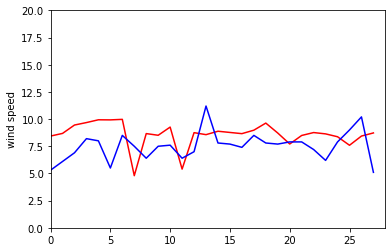

In [ ]:
plt.xlim(0, len(x_test))
plt.ylim(0, 20)                      
plt.ylabel("wind speed")
plt.plot(y_pred_LinearRegression,'r')
plt.plot(y_test,'b')
plt.show()

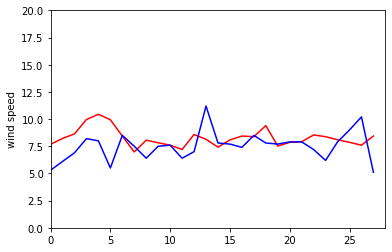

In [ ]:
plt.xlim(0, len(x_test))
plt.ylim(0, 20)                      
plt.ylabel("wind speed")
plt.plot(y_pred_KNeighborsRegressor,'r')
plt.plot(y_test,'b')
plt.show()

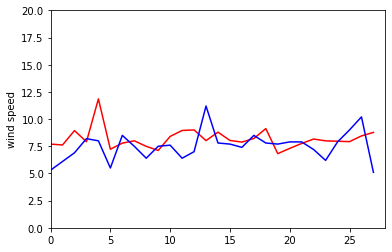

In [ ]:
plt.xlim(0, len(x_test))
plt.ylim(0, 20)                      
plt.ylabel("wind speed")
plt.plot(y_pred_XGBRegressor,'r')
plt.plot(y_test,'b')
plt.show()

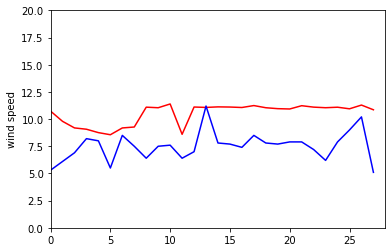

In [ ]:
plt.xlim(0, len(x_test))
plt.ylim(0, 20)                      
plt.ylabel("wind speed")
plt.plot(y_pred_ANN,'r')
plt.plot(y_test,'b')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller as ADF
y_train_ARIMA= np.squeeze(y_train)
ADF(y_train_ARIMA)

(-2.934580523476258,
 0.041472004793799595,
 10,
 354,
 {'1%': -3.4489583388155194,
  '10%': -2.5711381780459,
  '5%': -2.869739378430086},
 1615.5780522190375)

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox   
acorr_ljungbox(y_train1,lags=1)

(array([100.49903454]), array([1.18454683e-23]))

In [ ]:
from statsmodels.tsa.arima_model import  ARIMA

pmax = int(len(y_test)/10)
qmax = int(len(y_test)/10)

matrix = []
for p in range(pmax+1):
  tmp =[]
  for q in range (qmax+1):
    try:
      tmp.append(ARIMA(y_test,(p,1,q)).fit().bic)
    except:
      tmp.append(None)

  matrix.append(tmp)
matrix = pd.DataFrame(matrix)    

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
matrix

,0,1,2,3
0,177.137170,180.248754,172.329984,175.599101
1,180.369452,NaN,NaN,NaN
2,182.358999,180.078826,NaN,NaN
3,185.531636,183.347251,182.102957,NaN


In [ ]:
p,q=bic_matrix.stack().idxmin()
print(p,q)

0 2


In [ ]:
p=0
q=2
model=ARIMA(y_train,(p,0,q)).fit()
model.predict(0,10,dynamic=True)

array([6.60312488, 7.75571955, 8.87801517, 8.87801517, 8.87801517,
       8.87801517, 8.87801517, 8.87801517, 8.87801517, 8.87801517,
       8.87801517])

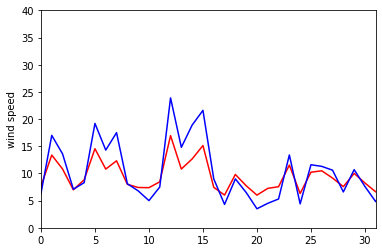

In [ ]:
y_pred_ = model.predict(1,365,dynamic=False) 
plt.xlim(0, 31)
plt.ylim(0, 40)                      
plt.ylabel("wind speed")
plt.plot(y_pred_,'r')
plt.plot(y_train,'b')
plt.show()

In [ ]:

# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor       
from sklearn.neighbors import KNeighborsRegressor     
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

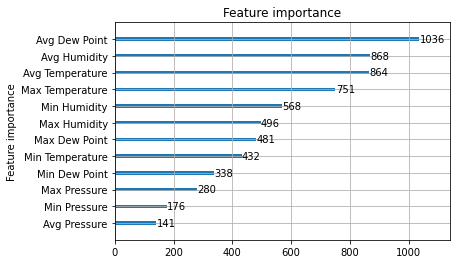

In [ ]:
from xgboost import plot_importance
feature_list = ['Max Temperature' , 'Avg Temperature' , 'Min Temperature' , 'Max Dew Point'
,'Avg Dew Point','Min Dew Point','Max Humidity',
'Avg Humidity','Min Humidity','Max Pressure','Avg Pressure','Min Pressure']
model_XGBRegressor.get_booster().feature_names = [feature_list[0],feature_list[1],feature_list[2],
                        feature_list[3],feature_list[4],feature_list[5],
                        feature_list[6],feature_list[7],feature_list[8],
                        feature_list[9],feature_list[10],feature_list[11]]
plot_importance(model_XGBRegressor,importance_type='weight',xlabel=None,ylabel='Feature importance')
pyplot.show()

Cairo 1.3367495979581563
Tripoli 1.3745394400187902
Khartoum 1.75047197001321
Lagos 1.6846608536584036
Johannesburg 2.135745072364807
Cape Down 2.341782737600392
Alexander (Egypt) 1.5780915345464432
Durban (South Africa) 3.000118626397231
Dar es Salaam (Tanzania) 1.896636597863559
Luanda (Angola) 1.2492547733443125


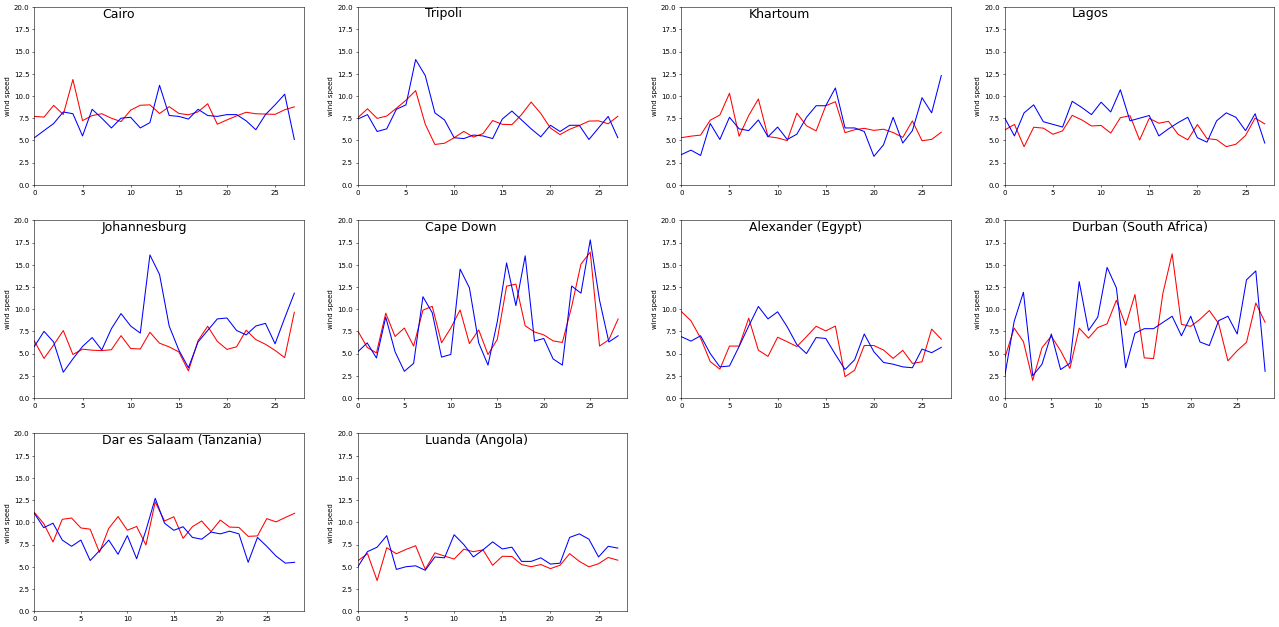

In [ ]:
from sklearn.metrics import mean_absolute_error
city_list= ['Cairo','Tripoli','Khartoum','Lagos','Johannesburg','Cape Down',
            'Alexander (Egypt)','Durban (South Africa)',
            'Dar es Salaam (Tanzania)','Luanda (Angola)']


feature_list = ['Max Temperature' , 'Avg Temperature' , 'Min Temperature' , 'Max Dew Point'
,'Avg Dew Point','Min Dew Point','Max Humidity',
'Avg Humidity','Min Humidity','Max Pressure','Avg Pressure','Min Pressure']


fig = plt.figure(figsize=(32,16),dpi=50) 
for j in range (10):
    lists = pd.read_excel("/content/train set.xls", sheet_name=j)
    a=lists.values
    number = a[1:len(a)]
    number1 = pd.DataFrame()
    number2 = pd.DataFrame()
    for i in range (len(lists)-1):
      number1[i]=number[i][1:13]
      number2[i]=number[i][14:15]
    new_number1 = pd.DataFrame(number1.values.T, index=number1.columns, columns=number1.index)
    new_number2 = pd.DataFrame(number2.values.T, index=number2.columns, columns=number2.index)
    value1 = new_number1.values
    value2 = new_number2.values
    x_train=np.array(value1.tolist())
    y_train=np.array(value2.tolist())
    lists = pd.read_excel("/content/test set.xls", sheet_name=j)
    a=lists.values
    number = a[1:len(a)]
    number1 = pd.DataFrame()
    number2 = pd.DataFrame()
    for i in range (len(lists)-1):
      number1[i]=number[i][1:13]
      number2[i]=number[i][14:15]
    new_number1 = pd.DataFrame(number1.values.T, index=number1.columns, columns=number1.index)
    new_number2 = pd.DataFrame(number2.values.T, index=number2.columns, columns=number2.index)
    value1 = new_number1.values
    value2 = new_number2.values
    x_test=np.array(value1.tolist())
    y_test=np.array(value2.tolist())
    model_XGBRegressor = XGBRegressor(n_estimators=1000, learning_rate=0.05,early_stopping_rounds=1,
                                      objective ='reg:squarederror')
    model_XGBRegressor.fit(x_train,y_train)
    y_pred_XGBRegressor=model_XGBRegressor.predict(x_test)
    plt.subplot(3,4,j+1)
    plt.text(len(x_test)/4, 20, city_list[j], fontsize=18,va='top')
    plt.xlim(0, len(x_test))
    plt.ylim(0, 20)                      
    plt.ylabel("wind speed")
    plt.plot(y_pred_XGBRegressor,'r')
    plt.plot(y_test,'b')
    mse = mean_absolute_error(y_pred_XGBRegressor,y_test)
    print(city_list[j],mse)

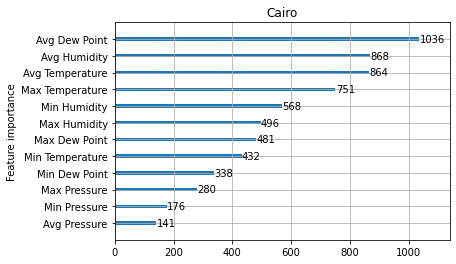

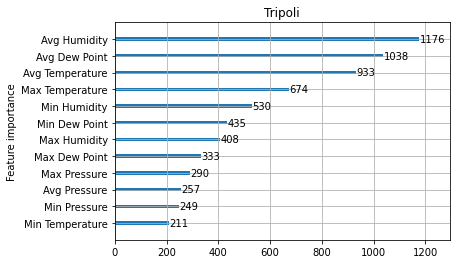

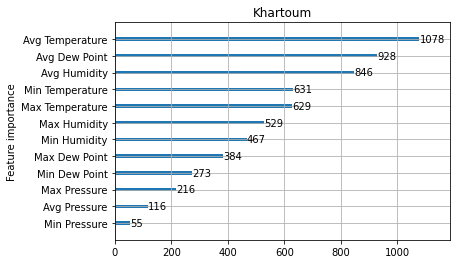

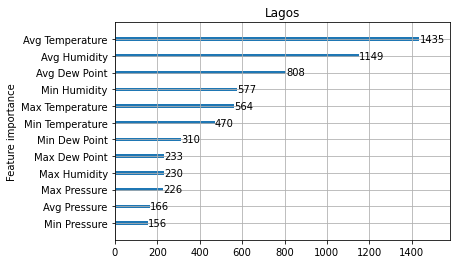

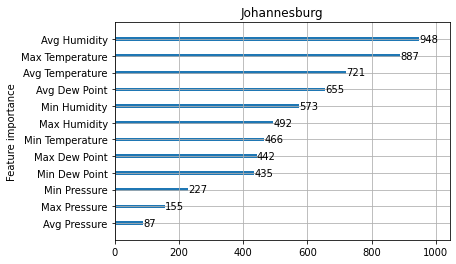

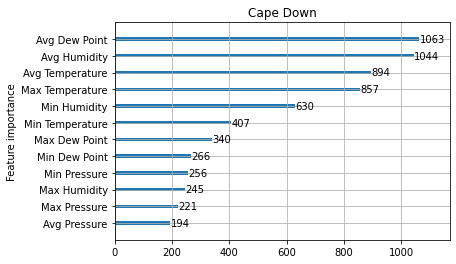

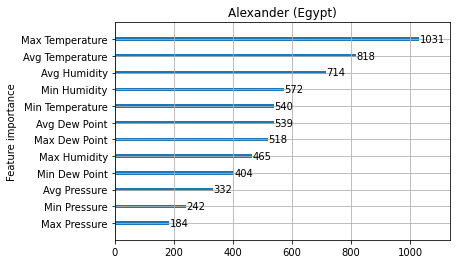

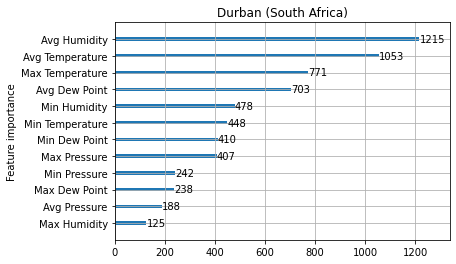

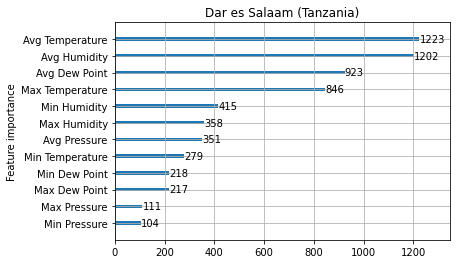

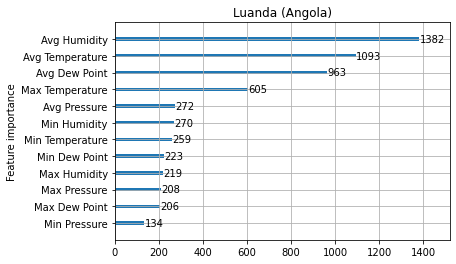

In [ ]:
from xgboost import plot_importance
for j in range (10):
    lists = pd.read_excel("/content/train set.xls", sheet_name=j)
    a=lists.values
    number = a[1:len(a)]
    number1 = pd.DataFrame()
    number2 = pd.DataFrame()
    for i in range (len(lists)-1):
      number1[i]=number[i][1:13]
      number2[i]=number[i][14:15]
    new_number1 = pd.DataFrame(number1.values.T, index=number1.columns, columns=number1.index)
    new_number2 = pd.DataFrame(number2.values.T, index=number2.columns, columns=number2.index)
    value1 = new_number1.values
    value2 = new_number2.values
    x_train=np.array(value1.tolist())
    y_train=np.array(value2.tolist())
    lists = pd.read_excel("/content/test set.xls", sheet_name=j)
    a=lists.values
    number = a[1:len(a)]
    number1 = pd.DataFrame()
    number2 = pd.DataFrame()
    for i in range (len(lists)-1):
      number1[i]=number[i][1:13]
      number2[i]=number[i][14:15]
    new_number1 = pd.DataFrame(number1.values.T, index=number1.columns, columns=number1.index)
    new_number2 = pd.DataFrame(number2.values.T, index=number2.columns, columns=number2.index)
    value1 = new_number1.values
    value2 = new_number2.values
    x_test=np.array(value1.tolist())
    y_test=np.array(value2.tolist())
    model_XGBRegressor = XGBRegressor(n_estimators=1000, learning_rate=0.05,early_stopping_rounds=1,
                                      objective ='reg:squarederror')
    model_XGBRegressor.fit(x_train,y_train)
    y_pred_XGBRegressor=model_XGBRegressor.predict(x_test)
    model_XGBRegressor.get_booster().feature_names = [feature_list[0],feature_list[1],feature_list[2],feature_list[3],feature_list[4],feature_list[5],feature_list[6],feature_list[7],feature_list[8],feature_list[9],feature_list[10],feature_list[11]]
    plot_importance(model_XGBRegressor,importance_type='weight',title=city_list[j],xlabel=None,ylabel='Feature importance')